# Kurapati Venkatesh
# 09012021
# Topic: Association Rules

# ---------------------------------------------------------------------------

## Kitabi Duniya , a famous book store in India, which was established before Independence, the growth of the company was incremental year by year, but due to online selling of books and wide spread Internet access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this heritage book store gain its popularity back and increase footfall of customers and provide ways the business can improve exponentially, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

## -----------------------------------------------------------------------------------

### Business objective: To help this heritage book store gain its popularity back and increase footfall of customers and provide ways the business can improve exponentially, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

## -------------------------------------------------------------------------------------------

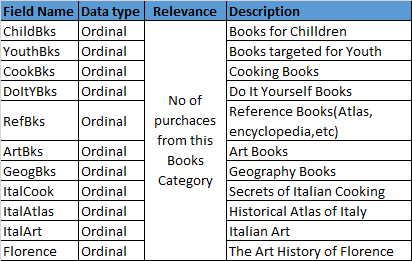

Import libraries:

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

Load Dataset:

In [3]:
df = pd.read_csv("G:\\360digit\\assignments meterial\\association rules\\book.csv", sep=',') 

Print top 5 rows: 

In [4]:
df.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


Each row of the dataset represents items that were purchased together on the same day at the same store.

There are only 11 books in total that make up the entire dataset.

In [109]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Applying Apriori:

In [29]:
freq_items = apriori(df, min_support=0.05, use_colnames=True, verbose=1)
freq_items

Processing 175 combinations | Sampling itemset size 5


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, GeogBks, YouthBks)"
96,0.0560,"(CookBks, ArtBks, GeogBks, YouthBks)"
97,0.0650,"(CookBks, DoItYBks, GeogBks, ArtBks)"
98,0.0510,"(ChildBks, DoItYBks, YouthBks, CookBks, GeogBks)"


#### Mining Association Rules:

#### Most Frequent item sets based on support:

In [77]:
freq_items.sort_values('support', ascending = False, inplace = True)

<ipython-input-99-16a0ffc2cde6>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')


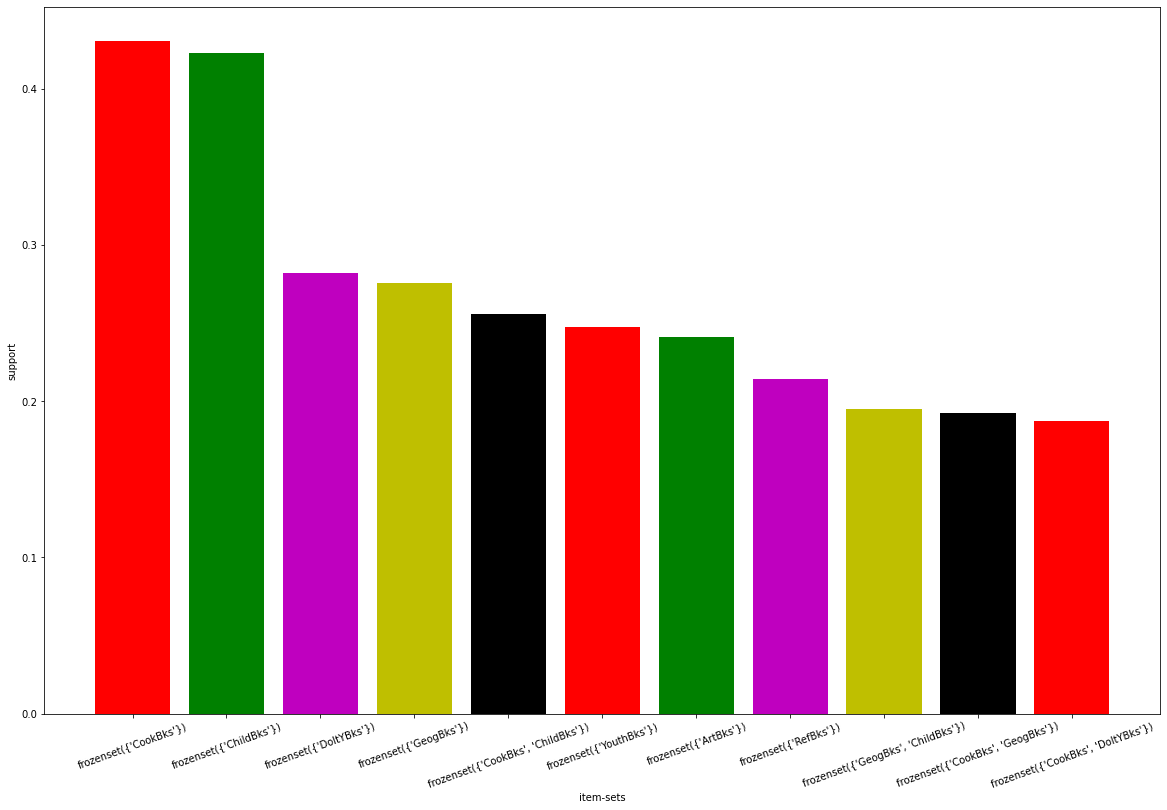

In [99]:
plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), freq_items.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

Cook books and Child books are highly sold books.

In [82]:
rules = association_rules(freq_items, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
422,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
419,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
564,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
561,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
563,"(ItalCook, GeogBks)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
562,"(CookBks, ChildBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
514,"(CookBks, ArtBks, ChildBks)","(DoItYBks, GeogBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
527,"(DoItYBks, GeogBks)","(CookBks, ArtBks, ChildBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
567,(ItalCook),"(CookBks, GeogBks, ChildBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
558,"(CookBks, GeogBks, ChildBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


The result of association analysis shows which item is frequently purchased with other items.

## Analysis of Rules:

##### Let's say we are ony interested in rules that satisfy the following criteria:

##### 1. at least 2 antecedents
##### 2. a confidence > 0.75
##### 3. a lift score > 1.2

###### 1.  Rule 5 indicates that if a ItalCook book and Geography Books are purchased, then with 82.03% confidence a Child book and a Cook Book will also be purchased. The Antecedent Support column indicates that the rule has the support of 64 transactions, meaning that 64 people bought a Ital Cook book, and a Geography book. The Cosequent Support column indicates the number of transactions involving the purchase of a Child book and a Cook Book . The Support column indicate the number of transactions where a ItalCook book, Geography book, Child book and Cook Book were purchased.
###### 2.  The Lift Ratio indicates how likely a transaction will be found where all four book types (ItalCook, Geography, Cook and Child) are purchased, as compared to the entire population of transactions. In other words, the Lift Ratio is the Confidence divided by the value for Support for Consequent. 
###### 3. The support value for the fifth rule is 0.0525. This number is calculated by dividing the number of transactions containing Italcook and Geography books divided by total number of transactions. The confidence level for the rule is 0.820312 which shows that out of all the transactions that contain Italcook and Geobooks, 82.03% of the transactions also contain child book and Cook book. Finally, the lift of 3.2 tells us that  child book and Cook book is 3.2 times more likely to be bought by the customers who buy  ItalCook book and Geography Book compared to the default likelihood of the sale of ItalCook book and Geography Book.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizing results:

#### 1. Support vs Confidence:

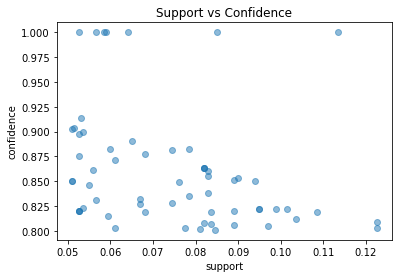

In [20]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

###### Above Scatter plot represents moderate, negetive and may be linear correlation between Support and Confidence. There are atleast 6 outliers present in the top area of the plot.

#### 2. Support vs Lift:

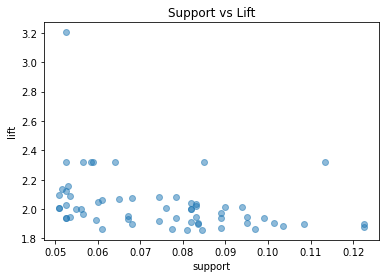

In [24]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

###### Above Scatter plot represents moderate, negetive and linear correlation between Support and Lift. There is an outlier present in the top area of the plot.

#### 3. Lift vs Confidence:

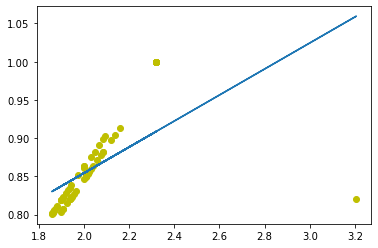

In [26]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

###### Mathematically it is not the best fit to the data. Above Scatter plot represents strong, positive and linear correlation between Lift and Confidence. There is an outliers present in the plot.

### --------------------EXTRA PART-------------------------

In [102]:
def to_list(i):
    return (sorted(list(i)))

In [103]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)

In [104]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [105]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

#### Getting rules without any redudancy: 

In [106]:
rules_no_redudancy = rules.iloc[index_rules, :]

#### Sorting them with respect to list and getting top 10 rules:

In [107]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
542,"(DoItYBks, ChildBks, YouthBks)",(RefBks),0.0950,0.2145,0.0530,0.557895,2.600908,0.032622,1.776726
340,"(CookBks, DoItYBks, GeogBks)",(ArtBks),0.1085,0.2410,0.0650,0.599078,2.485802,0.038852,1.893138
312,"(CookBks, ChildBks, YouthBks)",(RefBks),0.1290,0.2145,0.0680,0.527132,2.457491,0.040330,1.661139
254,"(CookBks, GeogBks, ChildBks)",(RefBks),0.1495,0.2145,0.0785,0.525084,2.447942,0.046432,1.653975
604,"(GeogBks, ChildBks, YouthBks)",(RefBks),0.0990,0.2145,0.0515,0.520202,2.425184,0.030264,1.637147
280,"(CookBks, DoItYBks, ChildBks)",(RefBks),0.1460,0.2145,0.0745,0.510274,2.378900,0.043183,1.603958
506,"(CookBks, DoItYBks, ChildBks, ArtBks)",(GeogBks),0.0820,0.2760,0.0535,0.652439,2.363910,0.030868,2.083088
402,"(DoItYBks, GeogBks, ChildBks)",(ArtBks),0.1045,0.2410,0.0595,0.569378,2.362564,0.034315,1.762567
194,"(ChildBks, YouthBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579
570,"(DoItYBks, GeogBks, ChildBks)",(RefBks),0.1045,0.2145,0.0525,0.502392,2.342155,0.030085,1.578553


##### Recommendations:

From the above table it is clear that, in most purchases the consequent is Reference Book. So, it is Recommendable that the shop should maintain the Reference Books stock all the time. 